## Pandas로 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('seoul_parks.csv')
data

,이름,위도,경도,면적,구
0,보라매공원,37.4991,126.9208,425992,동작구
1,서울숲,37.5446,127.0371,1165700,성동구
2,남산공원,37.5509,126.9905,1191416,중구
3,월드컵공원,37.5683,126.8986,2690000,마포구
4,어린이대공원,37.5485,127.0746,530000,광진구
5,용산가족공원,37.5233,126.9802,75000,용산구
6,응봉산근린공원,37.5584,127.0343,200000,성동구
7,우장산근린공원,37.5410,126.8365,300000,강서구


## matplotlib 시각화

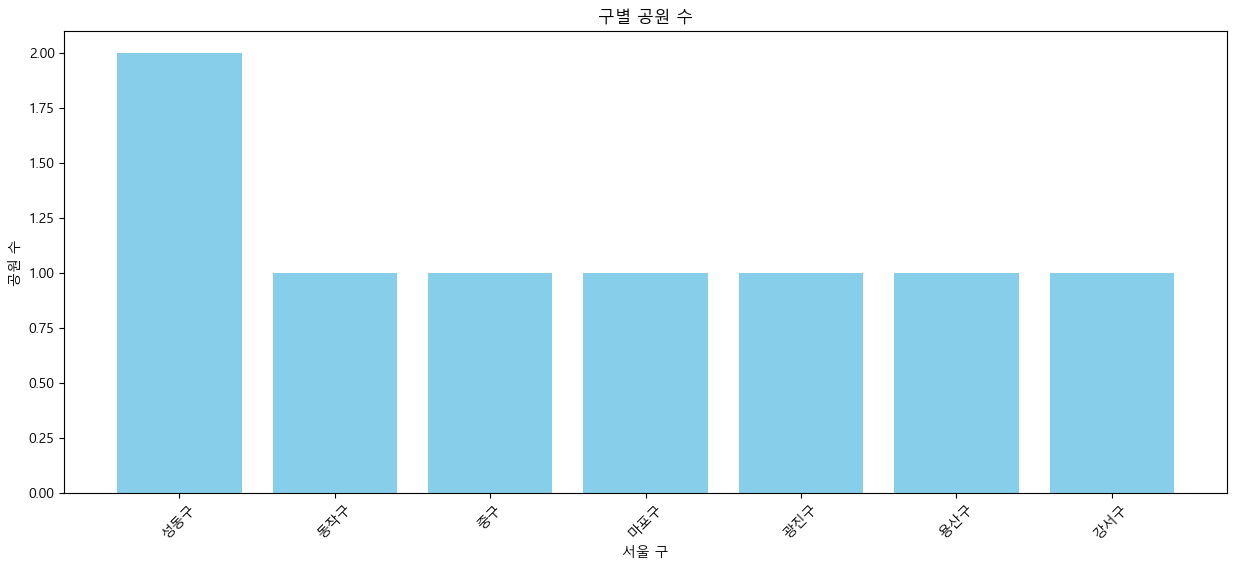

In [130]:
import matplotlib.pyplot as plt

# 구별 공원 개수 계산
park_counts = data['구'].value_counts()

# 그래프 설정
plt.figure(figsize=(15, 6))
plt.rc('font', family='Malgun Gothic')
plt.bar(park_counts.index, park_counts.values, color='skyblue')

# 축, 제목 설정
plt.xlabel('서울 구')
plt.ylabel('공원 수')
plt.title('구별 공원 수')
plt.xticks(rotation=45)  

plt.show()


## 

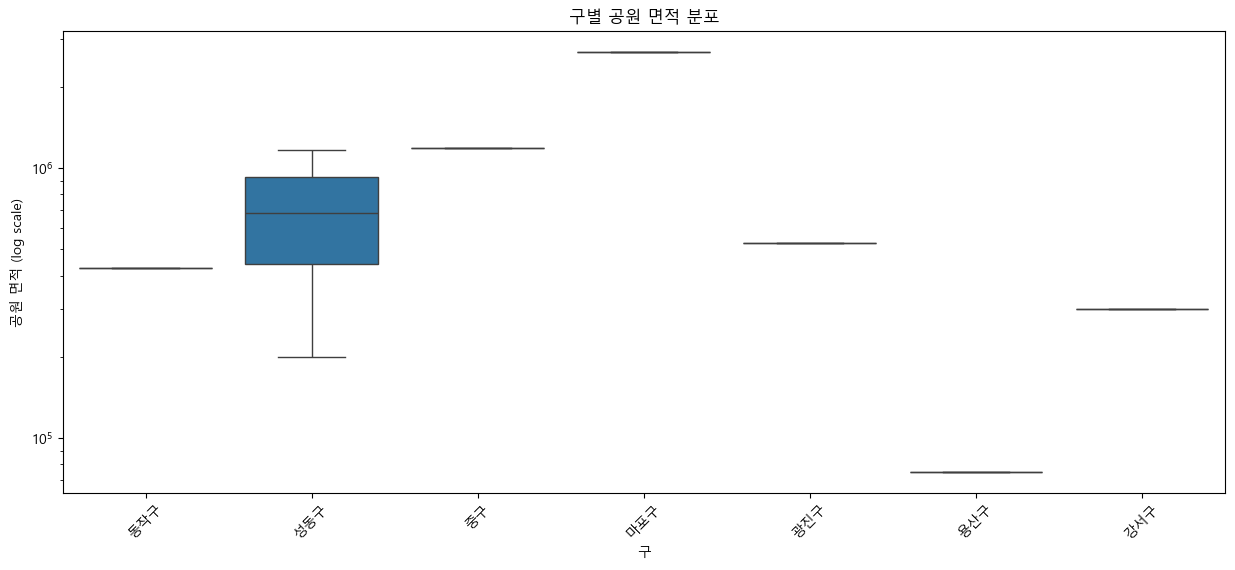

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.rc('font', family='Malgun Gothic')

sns.boxplot(x=data['구'], y=data['면적'], hue=None, showfliers=False)

# y축 로그 스케일 적용
plt.yscale('log')

# 축 및 제목 설정
plt.xlabel('구')
plt.ylabel('공원 면적 (log scale)')
plt.title('구별 공원 면적 분포')

plt.xticks(rotation=45)
plt.show()


## plotly 시각화 

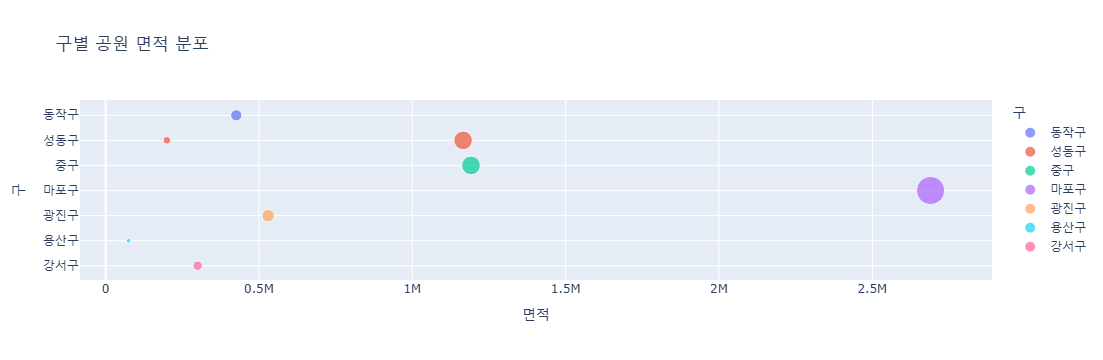

In [109]:
import plotly.express as px

# Plotly 산점도 생성
fig = px.scatter(
    data,
    x="면적",  # 공원 면적
    y="구",   # 구 이름
    size="면적",  # 공원 면적
    hover_name="이름",  # 시 공원 이름 표시
    title="구별 공원 면적 분포",
    color="구",  # 구별
)

fig.show()

## folium 지도 시각화

In [143]:
import folium

# 지도 생성 
m = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12, width=800, height=500)

# 공원의 각 위치에 마커 추가
for idx, row in data.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']], 
        popup=f"<strong>공원 이름:</strong> {row['이름']}<br><strong>면적:</strong> {row['면적']}㎡",
        icon=folium.Icon(color='green', icon='info-sign')  
    ).add_to(m)

m
